In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
train_data = pd.read_csv('../Data/train.csv')

In [5]:
test_data = pd.read_csv('../Data/test.csv')

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [30]:
missing_values = train_data.isnull().sum() / len(train_data) * 100
missing_values[missing_values != 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

# Feature processing

Let's list all the features that contains outliers or missing values:

- Missing values: Alley, MasVnrType,BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FirePlaceQu, GarageType, GarageFinish, GarageQual, GarageCond
- Potential outliers:  LotFrontage, MasVnrArea, GarageYrBlt

 


# Data Analytics

Let's analyse the GrLivArea feature:

GrLivArea - Ground Living area in the house

Ploting GrLivArea with SalePrice to look at the data distribution.

In [14]:
train_correlation = train_data.corr().abs()
train_correlation[train_correlation > 0.5]["SalePrice"]

Id                    NaN
MSSubClass            NaN
LotFrontage           NaN
LotArea               NaN
OverallQual      0.790982
OverallCond           NaN
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea            NaN
BsmtFinSF1            NaN
BsmtFinSF2            NaN
BsmtUnfSF             NaN
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF              NaN
LowQualFinSF          NaN
GrLivArea        0.708624
BsmtFullBath          NaN
BsmtHalfBath          NaN
FullBath         0.560664
HalfBath              NaN
BedroomAbvGr          NaN
KitchenAbvGr          NaN
TotRmsAbvGrd     0.533723
Fireplaces            NaN
GarageYrBlt           NaN
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF            NaN
OpenPorchSF           NaN
EnclosedPorch         NaN
3SsnPorch             NaN
ScreenPorch           NaN
PoolArea              NaN
MiscVal               NaN
MoSold                NaN
YrSold                NaN
SalePrice        1.000000
Name: SalePr

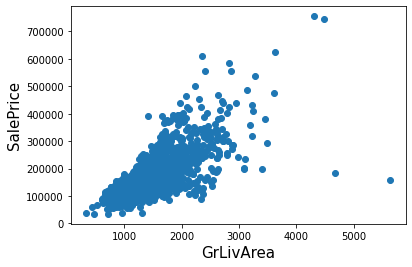

In [8]:
plt.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

From the scatter plot, SalePrice seems to increase as the GrLivArea increases. With an exception of a few values that show a different behavior(outliers). We will remove the outliers to minimize erros in the model.

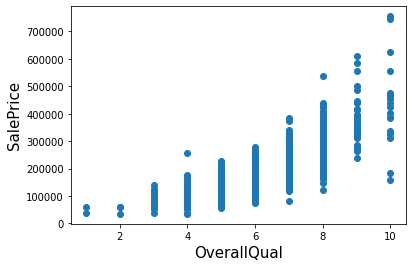

In [15]:
plt.scatter(x = train_data['OverallQual'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('OverallQual', fontsize=15)
plt.show()

In [ ]:
#Data Cleaning
train_data = train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 250000)].index)

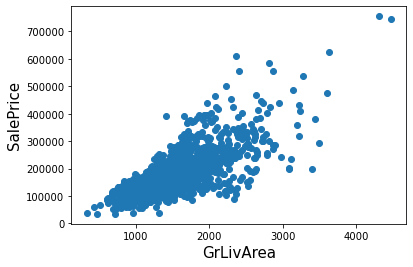

In [ ]:
plt.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [ ]:
x = train_data['GrLivArea']
y = train_data['SalePrice']

In [ ]:
np.polyfit(x,y,1) #line fitting

array([ 115.03998299, 7168.96988485])

In [ ]:
model = np.polyfit(x,y,1) #renaming

In [ ]:
predict = np.poly1d(model) #predicitng house price. Works similar to equation of a line

In [ ]:
area = 350
predict(area) #predicting house price if area was about 350

47432.96393267316

In [ ]:
print(predict)

 
115 x + 7169


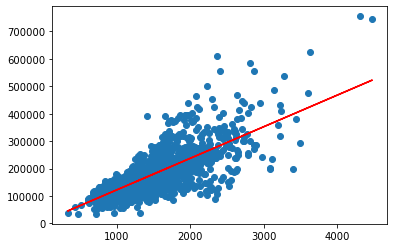

In [ ]:
x_lin_reg = x
y_lin_reg = predict(x_lin_reg)
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7b27ba51-0111-4a6c-b402-16937598b003' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>